# Alzheimers_dataset #

Dataset: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

## 1. Imports and loading dataset ##

In [351]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('bright')
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [304]:
os.chdir('C:\\Users\\tgsog\\OneDrive\\Desktop\\Project portfolio')
path = "C:\\Users\\tgsog\\OneDrive\\Desktop\\Project portfolio\\Alzheimers Cross sectional data -project\\alzheimers_disease_data.csv"
df = pd.read_csv(path)
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## 2. Columns explained: ##

Patient ID
- PatientID: A unique identifier assigned to each patient (4751 to 6900).
  
Demographic Details
- Age: The age of the patients ranges from 60 to 90 years.
- Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
  
Ethnicity: The ethnicity of the patients, coded as follows:
- 0: Caucasian
- 1: African American
- 2: Asian
- 3: Other
  
EducationLevel: The education level of the patients, coded as follows:
- 0: None
- 1: High School
- 2: Bachelor's
- 3: Higher
  
Lifestyle Factors
- BMI: Body Mass Index of the patients, ranging from 15 to 40.
- Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
- AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
- PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
- DietQuality: Diet quality score, ranging from 0 to 10.
- SleepQuality: Sleep quality score, ranging from 4 to 10.
  
Medical History
- FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
- CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
- Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
- Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
- HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.
- Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

Clinical Measurements
- SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
- DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
- CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
- CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

Cognitive and Functional Assessments
- MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
- MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
- BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
- ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

Symptoms
- Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.
- Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
- PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
- DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
- Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

Diagnosis Information
- Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

## 3. Inspecting data ##

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [305]:
df = df.drop(columns="DoctorInCharge")

In [154]:
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [155]:
df. describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
l={}
for row in df.columns:
    l.update({row:df[row].unique()})
l

{'PatientID': array([4751, 4752, 4753, ..., 6897, 6898, 6899], dtype=int64),
 'Age': array([73, 89, 74, 86, 68, 75, 72, 87, 78, 84, 64, 69, 63, 65, 82, 77, 71,
        83, 79, 67, 66, 70, 85, 60, 88, 62, 81, 61, 80, 90, 76],
       dtype=int64),
 'Gender': array([0, 1], dtype=int64),
 'Ethnicity': array([0, 3, 1, 2], dtype=int64),
 'EducationLevel': array([2, 0, 1, 3], dtype=int64),
 'BMI': array([22.92774923, 26.82768119, 17.79588244, ..., 15.47647896,
        15.29991122, 33.28973831]),
 'Smoking': array([0, 1], dtype=int64),
 'AlcoholConsumption': array([13.29721773,  4.54252382, 19.55508453, ...,  4.59467018,
         8.67450518,  7.89070315]),
 'PhysicalActivity': array([6.32711247, 7.61988454, 7.84498779, ..., 9.88600229, 6.35428175,
        6.57099338]),
 'DietQuality': array([1.34721431, 0.51876714, 1.82633466, ..., 8.12002455, 1.26342749,
        7.94140388]),
 'SleepQuality': array([9.02567867, 7.15129274, 9.67357416, ..., 5.76946355, 8.32287396,
        9.87871052]),
 'Famil

## 4. Cleaning data for analysis ##

Making columns categorical, and then dummies:
- Ethnicity
- EducationLevel

### Make into dummy variables ###

Ethnicity categorical

In [306]:
eth_map = {
    0:"Caucasian",
    1:"African American",
    2:"Asian",
    3:"Other"    
}

df.Ethnicity =df.Ethnicity.map(eth_map) 
df.Ethnicity

0       Caucasian
1       Caucasian
2           Other
3       Caucasian
4       Caucasian
          ...    
2144    Caucasian
2145    Caucasian
2146    Caucasian
2147        Other
2148    Caucasian
Name: Ethnicity, Length: 2149, dtype: object

Eduction categorical

In [307]:
educ_map = {
    0:"None",
    1:"High School",
    2:"Bachelors",
    3:"Higher"}
df.EducationLevel =df.EducationLevel.map(educ_map) 
df.EducationLevel

0         Bachelors
1              None
2       High School
3       High School
4              None
           ...     
2144    High School
2145      Bachelors
2146    High School
2147    High School
2148      Bachelors
Name: EducationLevel, Length: 2149, dtype: object

In [159]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

Encoding to dummies

In [308]:
dfc = pd.get_dummies(columns =["EducationLevel", "Ethnicity"], data = df)
dfc

,PatientID,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,Forgetfulness,Diagnosis,EducationLevel_Bachelors,EducationLevel_High School,EducationLevel_Higher,EducationLevel_None,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other
0,4751,73,0,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,...,0,0,True,False,False,False,False,False,True,False
1,4752,89,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,...,1,0,False,False,False,True,False,False,True,False
2,4753,73,0,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,...,0,0,False,True,False,False,False,False,False,True
3,4754,74,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,...,0,0,False,True,False,False,False,False,True,False
4,4755,89,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,...,0,0,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,...,0,1,False,True,False,False,False,False,True,False
2145,6896,75,0,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,...,0,1,True,False,False,False,False,False,True,False
2146,6897,77,0,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,...,0,1,False,True,False,False,False,False,True,False
2147,6898,78,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,...,1,1,False,True,False,False,False,False,False,True


Make into numeric

In [319]:
dfc = dfc.apply(pd.to_numeric, errors ="coerce")
dfc


,PatientID,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,Forgetfulness,Diagnosis,EducationLevel_Bachelors,EducationLevel_High School,EducationLevel_Higher,EducationLevel_None,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other
0,4751,73,0,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,...,0,0,True,False,False,False,False,False,True,False
1,4752,89,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,...,1,0,False,False,False,True,False,False,True,False
2,4753,73,0,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,...,0,0,False,True,False,False,False,False,False,True
3,4754,74,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,...,0,0,False,True,False,False,False,False,True,False
4,4755,89,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,...,0,0,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,...,0,1,False,True,False,False,False,False,True,False
2145,6896,75,0,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,...,0,1,True,False,False,False,False,False,True,False
2146,6897,77,0,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,...,0,1,False,True,False,False,False,False,True,False
2147,6898,78,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,...,1,1,False,True,False,False,False,False,False,True


Map all columns that are not numberic:

In [320]:
b_list=[]
for x in range(len(dfc.dtypes)):
    if dfc.dtypes.values[x] == bool:
        b_list.append(dfc.dtypes.index[x])

In [321]:
b_list

['EducationLevel_Bachelors',
 'EducationLevel_High School',
 'EducationLevel_Higher',
 'EducationLevel_None',
 'Ethnicity_African American',
 'Ethnicity_Asian',
 'Ethnicity_Caucasian',
 'Ethnicity_Other']

In [322]:
for col in dfc[b_list]:
    dfc[col] = dfc[col].astype(int)

In [323]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                     object
EducationLevel                object
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

## 5. Data Visualisations ##

EducationLevel - graph

C:\Users\tgsog\AppData\Local\Temp\ipykernel_14352\1420533618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df.EducationLevel, palette = ["#ff7e5f","#feb47b","#00c6ff","#0072ff"])


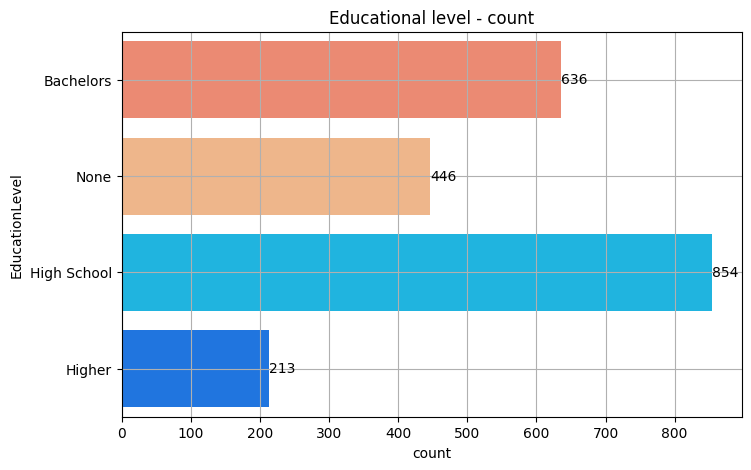

In [183]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.EducationLevel, palette = ["#ff7e5f","#feb47b","#00c6ff","#0072ff"])

plt.title("Educational level - count")
plt.grid(True)
for c in ax.containers:
    ax.bar_label(c)

plt.show()
plt.close()

Ethnicities - graph

C:\Users\tgsog\AppData\Local\Temp\ipykernel_14352\1480826085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df.Ethnicity, palette = ["#ff7e5f","#feb47b","#00c6ff","#0072ff"])


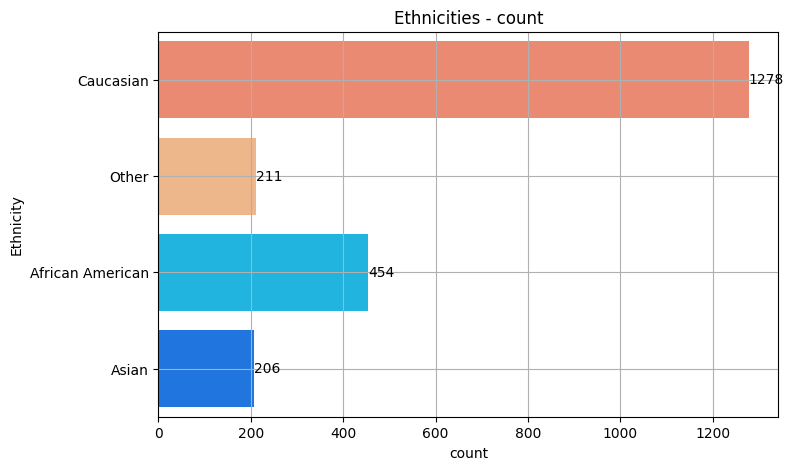

In [187]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.Ethnicity, palette = ["#ff7e5f","#feb47b","#00c6ff","#0072ff"])

plt.title("Ethnicities - count")
plt.grid(True)
for c in ax.containers:
    ax.bar_label(c)

plt.show()
plt.close()

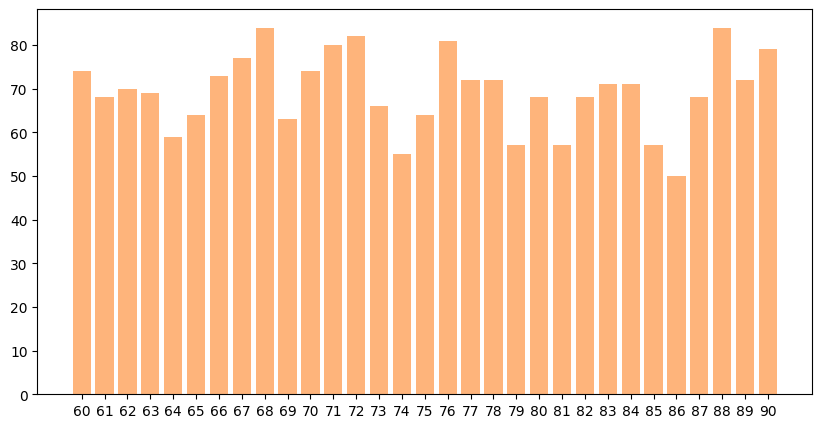

In [211]:
plt.figure(figsize =(10,5))
age_c = df.Age.value_counts()

plt.bar(x =age_c.index,height = age_c, color="#feb47b" )
plt.xticks(np.arange(min(age_c.index), max(age_c.index)+1, step =1))


plt.show()
plt.close()


In [212]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,Caucasian,Bachelors,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,Caucasian,None,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,Other,High School,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,Caucasian,High School,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,Caucasian,None,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,Caucasian,High School,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,Caucasian,Bachelors,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,Caucasian,High School,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,Other,High School,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1


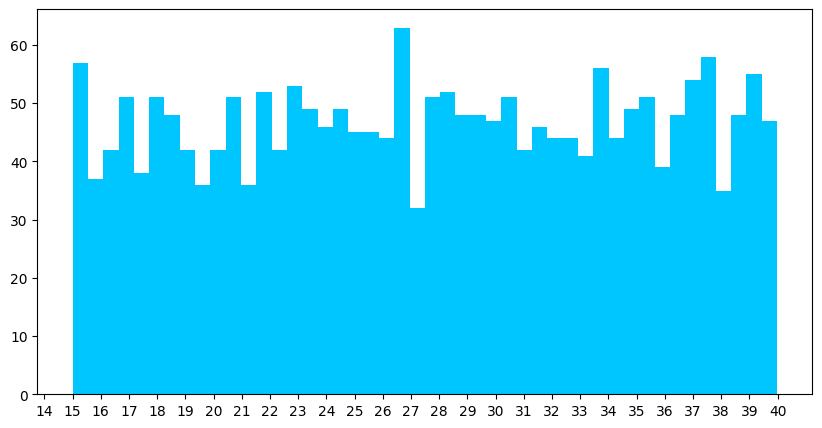

In [223]:
plt.figure(figsize =(10,5))
opt =int(round(np.sqrt(len(df)),0))

plt.hist(df.BMI, bins = opt, color = "#00c6ff")
plt.xticks(np.arange(min(df.BMI)-1, max(df.BMI)+1, step =1))

plt.show()
plt.close()

In [237]:
smoker_c = df.Smoking
smoker_c =smoker_c.replace(0,"non-smoker")
smoker_c = smoker_c.replace(1,"smoker")
smoker_c 

0       non-smoker
1       non-smoker
2       non-smoker
3           smoker
4       non-smoker
           ...    
2144    non-smoker
2145    non-smoker
2146    non-smoker
2147    non-smoker
2148    non-smoker
Name: Smoking, Length: 2149, dtype: object

plt.figure(figsize= (10,5))
ax = sns.countplot(smoker_c, palette =["#ff7e5f","#00c6ff"] )
for c in ax.containers:
    ax.bar_label(c)
plt.grid(True)

plt.show()
plt.close()

y - Alzheimers diagnosis

C:\Users\tgsog\AppData\Local\Temp\ipykernel_14352\3283104122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(alzh, palette =["#ff7e5f","#00c6ff"] )


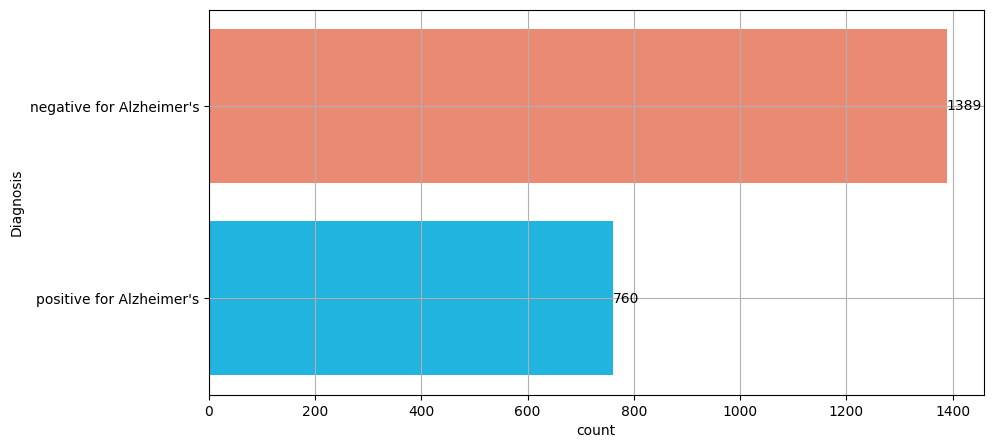

In [257]:
alzh = df.Diagnosis
alzh =alzh.replace(0,"negative for Alzheimer's")
alzh =alzh.replace(1,"positive for Alzheimer's")

plt.figure(figsize= (10,5))
ax = sns.countplot(alzh, palette =["#ff7e5f","#00c6ff"] )
for c in ax.containers:
    ax.bar_label(c)
plt.grid(True)

plt.show()

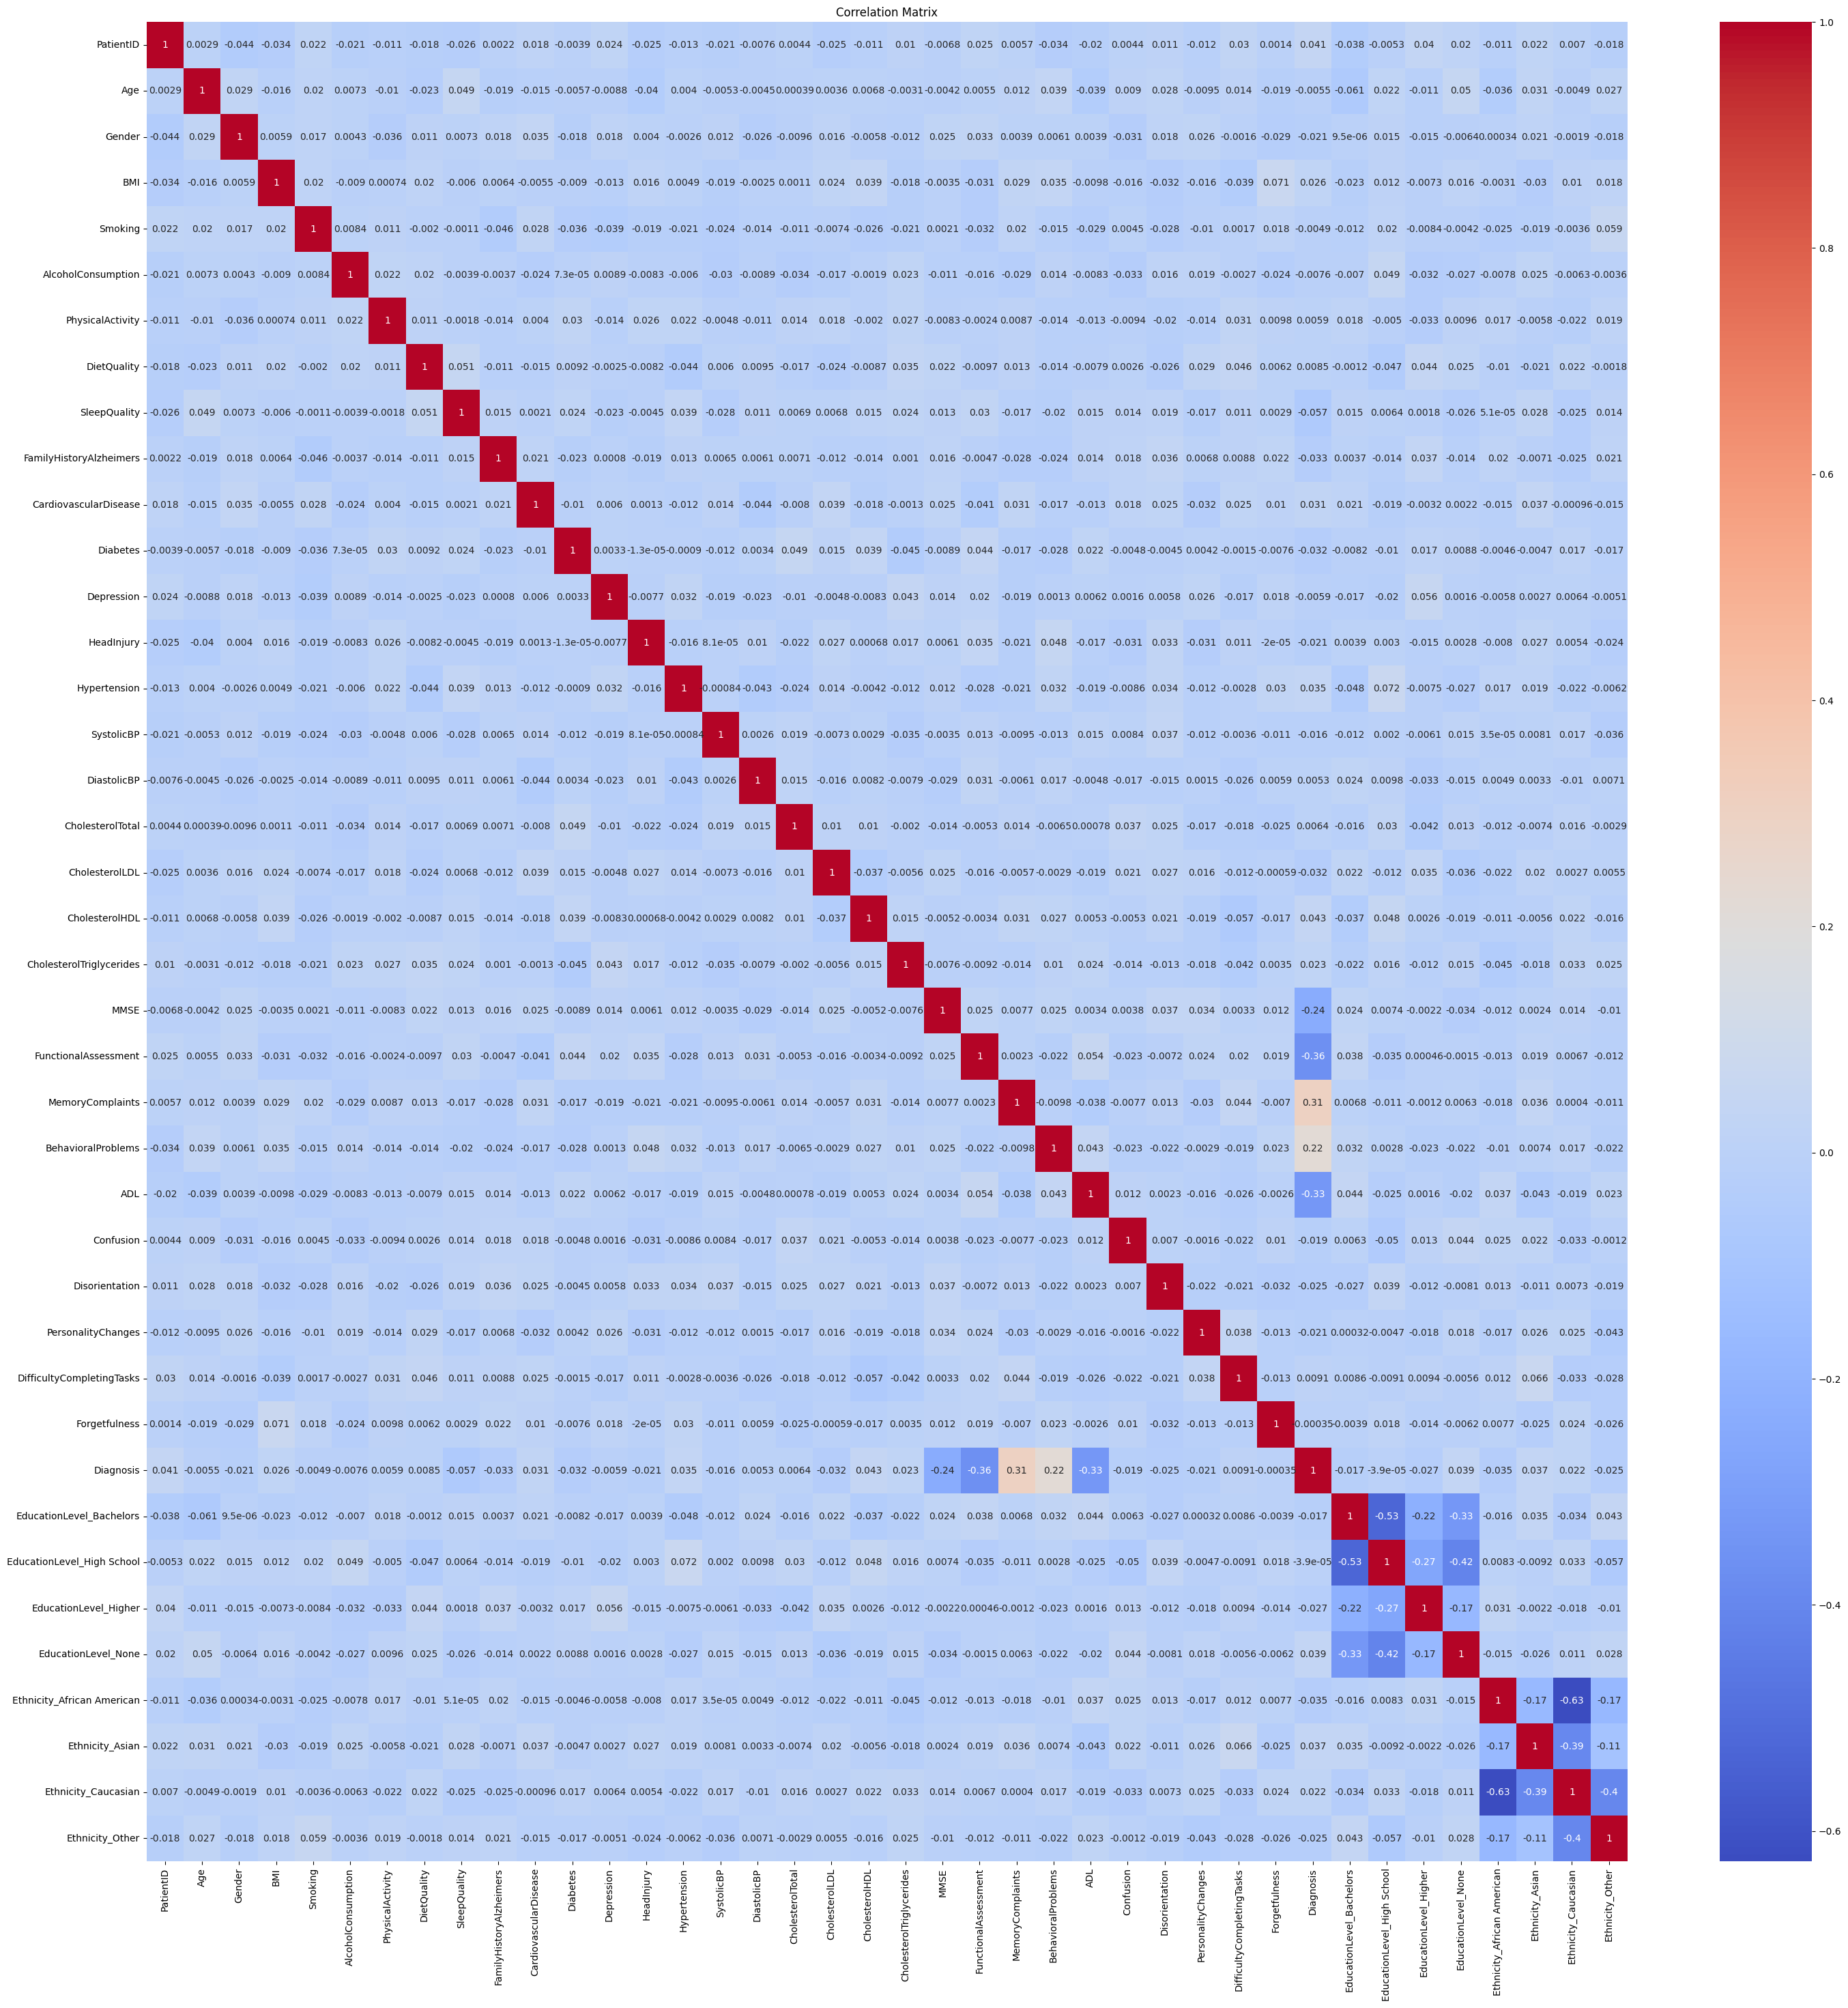

In [344]:
plt.figure(figsize=(35, 35))
sns.heatmap(dfc.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

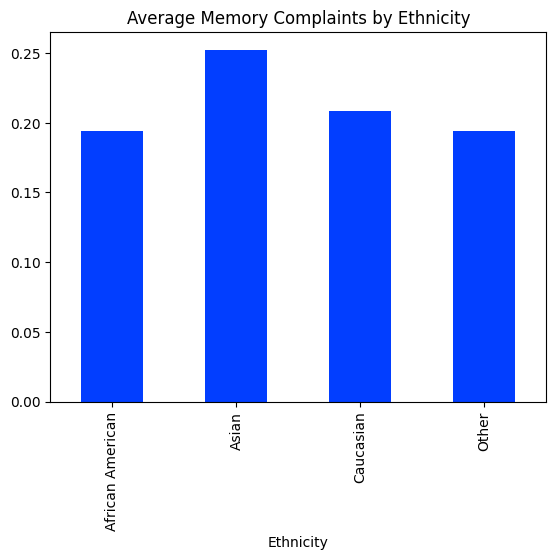

In [345]:
df.groupby('Ethnicity')['MemoryComplaints'].mean().plot(kind='bar')
plt.title("Average Memory Complaints by Ethnicity")
plt.show()

## Alzheimers OLS Regression Analysis ##

In [324]:
X_wo_constant = dfc.drop(columns = ["Diagnosis", "PatientID"])
y = dfc["Diagnosis"].reset_index().drop(columns = ["index"])

In [325]:
X= sm.add_constant(X_wo_constant)

In [326]:
model1 = sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Diagnosis   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     45.74
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          3.09e-234
Time:                        10:46:16   Log-Likelihood:                -844.16
No. Observations:                2149   AIC:                             1762.
Df Residuals:                    2112   BIC:                             1972.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.7576      0.078      9.680      0.000       0.604       0.911
Age                           -0.0016      0.001     -1.780      0.075      -0.003       0.000
Gender                        -0.0034      0.016     -0.214      0.831      -0.034       0.027
BMI                           -0.0003      0.001     -0.312      0.755      -0.002       0.002
Smoking                       -0.0264      0.017     -1.523      0.128      -0.060       0.008
AlcoholConsumption            -0.0012      0.001     -0.848      0.396      -0.004       0.002
PhysicalActivity              -0.0002      0.003     -0.061      0.952      -0.006       0.005
DietQuality                    0.0013      0.003      0.465      0.642      -0.004       0.007
SleepQuality                  -0.0079      0.004     -1.777      0.076      -0.017       0.001
FamilyHistoryAlzheimers       -0.0135      0.018     -0.748      0.455      -0.049       0.022
CardiovascularDisease          0.0217      0.022      0.968      0.333      -0.022       0.066
Diabetes                      -0.0007      0.022     -0.034      0.973      -0.044       0.042
Depression                     0.0099      0.020      0.503      0.615      -0.029       0.048
HeadInjury                    -0.0347      0.027     -1.279      0.201      -0.088       0.018
Hypertension                   0.0333      0.022      1.504      0.133      -0.010       0.077
SystolicBP                  -5.95e-05      0.000     -0.197      0.844      -0.001       0.001
DiastolicBP                    0.0002      0.000      0.385      0.700      -0.001       0.001
CholesterolTotal           -7.549e-06      0.000     -0.041      0.967      -0.000       0.000
CholesterolLDL                -0.0004      0.000     -2.007      0.045      -0.001   -8.24e-06
CholesterolHDL                 0.0005      0.000      1.591      0.112      -0.000       0.001
CholesterolTriglycerides       0.0001   7.72e-05      1.562      0.119   -3.08e-05       0.000
MMSE                          -0.0130      0.001    -14.293      0.000      -0.015      -0.011
FunctionalAssessment          -0.0559      0.003    -20.508      0.000      -0.061      -0.051
MemoryComplaints               0.3502      0.019     18.098      0.000       0.312       0.388
BehavioralProblems             0.3123      0.022     14.430      0.000       0.270       0.355
ADL                           -0.0507      0.003    -19.005      0.000      -0.056      -0.045
Confusion                     -0.0174      0.019     -0.895      0.371      -0.056       0.021
Disorientation                -0.0182      0.022     -0.845      0.398      -0.061       0.024
PersonalityChanges            -0.0026      0.022     -0.118      0.906      -0.046       0.040
DifficultyCompletingTasks      0.0014      

In [327]:
# Extract the coefficients, standard errors, and p-values
coefficients = model1.params  # Coefficients of the model
std_errors = model1.bse       # Standard errors of the coefficients
p_values = model1.pvalues     # p-values of the coefficients
conf_intervals = model1.conf_int()  # Confidence intervals for the coefficients

regression_results = pd.DataFrame({
    'Coefficients': coefficients,
    'Standard Errors': std_errors,
    'P-Values': p_values,
    'Confidence Interval Lower': conf_intervals[0],
    'Confidence Interval Upper': conf_intervals[1]
})

# Display the results in a DataFrame-like format
regression_results

,Coefficients,Standard Errors,P-Values,Confidence Interval Lower,Confidence Interval Upper
const,0.757562,0.078259,1.026466e-21,0.604090,0.911035
Age,-0.001560,0.000876,7.519407e-02,-0.003279,0.000159
Gender,-0.003352,0.015690,8.308454e-01,-0.034122,0.027417
BMI,-0.000340,0.001090,7.549341e-01,-0.002478,0.001798
Smoking,-0.026444,0.017364,1.279341e-01,-0.060496,0.007609
AlcoholConsumption,-0.001156,0.001363,3.963496e-01,-0.003830,0.001517
PhysicalActivity,-0.000166,0.002744,9.516593e-01,-0.005548,0.005216
DietQuality,0.001258,0.002706,6.420386e-01,-0.004049,0.006565
SleepQuality,-0.007919,0.004457,7.575976e-02,-0.016659,0.000822
FamilyHistoryAlzheimers,-0.013512,0.018066,4.545997e-01,-0.048942,0.021918


In [328]:
r1 =regression_results[regression_results["P-Values"]<0.05].index
r1

Index(['const', 'CholesterolLDL', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'EducationLevel_Bachelors', 'EducationLevel_High School',
       'EducationLevel_Higher', 'EducationLevel_None',
       'Ethnicity_African American', 'Ethnicity_Asian', 'Ethnicity_Caucasian',
       'Ethnicity_Other'],
      dtype='object')

In [329]:
X[r1]

,const,CholesterolLDL,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,EducationLevel_Bachelors,EducationLevel_High School,EducationLevel_Higher,EducationLevel_None,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other
0,1.0,56.150897,21.463532,6.518877,0,0,1.725883,1,0,0,0,0,0,1,0
1,1.0,193.407996,20.613267,7.118696,0,0,2.592424,0,0,0,1,0,0,1,0
2,1.0,153.322762,7.356249,5.895077,0,0,7.119548,0,1,0,0,0,0,0,1
3,1.0,65.366637,13.991127,8.965106,0,1,6.481226,0,1,0,0,0,0,1,0
4,1.0,92.869700,13.517609,6.045039,0,0,0.014691,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,1.0,94.870490,1.201190,0.238667,0,0,4.492838,0,1,0,0,0,0,1,0
2145,1.0,95.410700,6.458060,8.687480,0,1,9.204952,1,0,0,0,0,0,1,0
2146,1.0,156.267294,17.011003,1.972137,0,0,5.036334,0,1,0,0,0,0,1,0
2147,1.0,52.482961,4.030491,5.173891,0,0,3.785399,0,1,0,0,0,0,0,1


In [330]:
model2 = sm.OLS(y,X[r1]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Diagnosis   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     135.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          5.86e-252
Time:                        10:46:28   Log-Likelihood:                -855.42
No. Observations:                2149   AIC:                             1737.
Df Residuals:                    2136   BIC:                             1811.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.6689      0.023     29.256      0.000       0.624       0.714
CholesterolLDL                -0.0004      0.000     -2.120      0.034      -0.001   -2.86e-05
MMSE                          -0.0130      0.001    -14.383      0.000      -0.015      -0.011
FunctionalAssessment          -0.0561      0.003    -20.754      0.000      -0.061      -0.051
MemoryComplaints               0.3515      0.019     18.272      0.000       0.314       0.389
BehavioralProblems             0.3134      0.021     14.580      0.000       0.271       0.356
ADL                           -0.0505      0.003    -18.972      0.000      -0.056      -0.045
EducationLevel_Bachelors       0.1740      0.015     11.938      0.000       0.145       0.203
EducationLevel_High School     0.1594      0.013     12.138      0.000       0.134       0.185
EducationLevel_Higher          0.1412      0.021      6.664      0.000       0.100       0.183
EducationLevel_None            0.1943      0.016     12.316      0.000       0.163       0.225
Ethnicity_African American     0.1492      0.016      9.125      0.000       0.117       0.181
Ethnicity_Asian                0.1977      0.022      9.060      0.000       0.155       0.240
Ethnicity_Caucasian            0.1767      0.013     13.890      0.000       0.152       0.202
Ethnicity_Other                0.1454      0.022      6.748      0.000       0.103       0.188
==============================================================================
Omnibus:                       47.608   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.216
Skew:                           0.335   Prob(JB):                     5.59e-11
Kurtosis:                       2.718   Cond. No.                     1.17e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.78e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [331]:
# Extract the coefficients, standard errors, and p-values
coefficients = model2.params  # Coefficients of the model
std_errors = model2.bse       # Standard errors of the coefficients
p_values = model2.pvalues     # p-values of the coefficients
conf_intervals = model2.conf_int()  # Confidence intervals for the coefficients

regression_results = pd.DataFrame({
    'Coefficients': coefficients,
    'Standard Errors': std_errors,
    'P-Values': p_values,
    'Confidence Interval Lower': conf_intervals[0],
    'Confidence Interval Upper': conf_intervals[1]
})

# Display the results in a DataFrame-like format
regression_results

,Coefficients,Standard Errors,P-Values,Confidence Interval Lower,Confidence Interval Upper
const,0.668931,0.022865,1.614361e-158,0.624091,0.713770
CholesterolLDL,-0.000382,0.000180,3.412234e-02,-0.000735,-0.000029
MMSE,-0.013043,0.000907,7.696536e-45,-0.014822,-0.011265
FunctionalAssessment,-0.056133,0.002705,2.625936e-87,-0.061437,-0.050829
MemoryComplaints,0.351482,0.019236,2.042252e-69,0.313758,0.389206
BehavioralProblems,0.313412,0.021497,5.674938e-46,0.271255,0.355569
ADL,-0.050452,0.002659,2.645107e-74,-0.055667,-0.045237
EducationLevel_Bachelors,0.173979,0.014574,7.546497e-32,0.145399,0.202558
EducationLevel_High School,0.159363,0.013129,7.813788e-33,0.133615,0.185111
EducationLevel_Higher,0.141247,0.021197,3.390930e-11,0.099678,0.182816


In [332]:
# Variable Inflation Factor Calculation

X_vif = model2.model.exog #Independent vairabels from the model
X_vif
vif =pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_vif,i) for i in range(X_vif.shape[1])]
vif["Variable"] = model2.model.exog_names
print(vif)

         VIF                    Variable
0   0.000000                       const
1   1.004695              CholesterolLDL
2   1.003528                        MMSE
3   1.006858        FunctionalAssessment
4   1.003142            MemoryComplaints
5   1.005508          BehavioralProblems
6   1.012073                         ADL
7        inf    EducationLevel_Bachelors
8        inf  EducationLevel_High School
9        inf       EducationLevel_Higher
10       inf         EducationLevel_None
11       inf  Ethnicity_African American
12       inf             Ethnicity_Asian
13       inf         Ethnicity_Caucasian
14       inf             Ethnicity_Other


C:\Users\tgsog\anaconda3\envs\Python_conda_enviornment_\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\tgsog\anaconda3\envs\Python_conda_enviornment_\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### colinearity - if VIF => 5: colinear and should be excluded ###

In [333]:
vif = vif[vif.VIF<=5]

In [334]:
variables = vif.Variable.values
variables

array(['const', 'CholesterolLDL', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL'], dtype=object)

In [338]:
model3 = sm.OLS(y,X[variables]).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Diagnosis   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     269.3
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          3.90e-257
Time:                        10:47:08   Log-Likelihood:                -859.54
No. Observations:                2149   AIC:                             1733.
Df Residuals:                    2142   BIC:                             1773.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0086      0.033     30.310      0.000       0.943       1.074
CholesterolLDL          -0.0004      0.000     -2.153      0.031      -0.001   -3.45e-05
MMSE                    -0.0131      0.001    -14.399      0.000      -0.015      -0.011
FunctionalAssessment    -0.0559      0.003    -20.684      0.000      -0.061      -0.051
MemoryComplaints         0.3530      0.019     18.358      0.000       0.315       0.391
BehavioralProblems       0.3146      0.021     14.646      0.000       0.273       0.357
ADL                     -0.0508      0.003    -19.132      0.000      -0.056      -0.046
==============================================================================
Omnibus:                       48.559   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.823
Skew:                           0.335   Prob(JB):                     4.12e-11
Kurtosis:                       2.707   Cond. No.                         570.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Example
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm
#print("Model Accuracy:", clf.score(X_test, y_test))

array([[238,  39],
       [ 68,  85]], dtype=int64)

In [360]:
cm  =pd.DataFrame([[68,39],[238,85]])
cm.columns = ["Negative","Positive"]
cm.index = ["False","True"]
cm

,Negative,Positive
False,68,39
True,238,85


### Calculating Confusion matrix metrix: ###

In [366]:
accuracy = cm.values[cm.index == "True"].sum()/cm.sum().sum()
accuracy

0.7511627906976744

In [369]:
precision = cm.Positive.iloc[1]/cm.Positive.sum()
precision

0.6854838709677419

In [371]:
recall = cm.Positive.iloc[1]/(cm.Positive.iloc[1]+cm.Negative.iloc[0])
recall 

0.5555555555555556

In [373]:
F1_score = 2*(precision * recall)/(precision + recall)
F1_score

0.6137184115523466